In [ ]:
!pip install keras-tuner

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import tensorflow as tf
from tensorflow import keras
import numpy as np

In [ ]:
print(tf.__version__)

2.9.2


In [ ]:
fashion_mnist=keras.datasets.fashion_mnist

In [ ]:
(train_images,train_labels),(test_images,test_labels)=fashion_mnist.load_data()

In [ ]:
train_images[0].shape
test_images[0].shape

(28, 28)

In [ ]:
train_images=train_images/255.0
test_images=test_images/255.0

In [ ]:
train_images=train_images.reshape(len(train_images),28,28,1)
test_images=test_images.reshape(len(test_images),28,28,1)

In [ ]:
def build_model(hp):
  model=keras.Sequential([
      keras.layers.Conv2D(
          filters=hp.Int('conv_1st_filter',min_value=32,max_value=128,step=16),
          kernel_size=hp.Choice('conv_1st_kernal',values=[3,5]),
          activation='relu',
          input_shape=(28,28,1)
      ),
      keras.layers.Conv2D(
          filters=hp.Int('conv_2st_filter',min_value=32,max_value=128,step=16),
          kernel_size=hp.Choice('conv_2nd_kernal',values=[3,5]),
          activation='relu',
          input_shape=(28,28,1)
      ),
      keras.layers.Flatten(),
      keras.layers.Dense(
          units=hp.Int('dense_1st_layer',min_value=32,max_value=128,step=16),
          activation='relu'),
      keras.layers.Dense(10,activation='softmax')    
       ])
  model.compile(optimizer=keras.optimizers.Adam(hp.Choice('learning_rate',values=[1e-2,1e-3])),
                loss='sparse_categorical_crossentropy',
                metrics=['accuracy'])
  return model


In [ ]:
from kerastuner import RandomSearch
from kerastuner.engine.hyperparameters import HyperParameters

In [ ]:
tuner_search=RandomSearch(build_model,objective='val_accuracy',max_trials=5,directory='output',project_name='Mnist Fashion')

In [ ]:
tuner_search.search(train_images,train_labels,epochs=3,validation_split=0.1)

In [ ]:
model=tuner_search.get_best_models(num_models=1)[0]

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 24, 24, 112)       2912      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        32288     
                                                                 
 flatten (Flatten)           (None, 15488)             0         
                                                                 
 dense (Dense)               (None, 80)                1239120   
                                                                 
 dense_1 (Dense)             (None, 10)                810       
                                                                 
Total params: 1,275,130
Trainable params: 1,275,130
Non-trainable params: 0
_________________________________________________________________


In [ ]:
model.fit(train_images, train_labels, epochs=10, validation_split=0.1, initial_epoch=3)

Epoch 4/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1752 - accuracy: 0.9344 - val_loss: 0.2716 - val_accuracy: 0.9047
Epoch 5/10
1688/1688 [==============================] - 9s 5ms/step - loss: 0.1409 - accuracy: 0.9462 - val_loss: 0.2643 - val_accuracy: 0.9090
Epoch 6/10
1688/1688 [==============================] - 16s 10ms/step - loss: 0.1129 - accuracy: 0.9578 - val_loss: 0.2849 - val_accuracy: 0.9100
Epoch 7/10
1688/1688 [==============================] - 12s 7ms/step - loss: 0.0867 - accuracy: 0.9674 - val_loss: 0.3052 - val_accuracy: 0.9127
Epoch 8/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0701 - accuracy: 0.9739 - val_loss: 0.3796 - val_accuracy: 0.9132
Epoch 9/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0561 - accuracy: 0.9791 - val_loss: 0.4561 - val_accuracy: 0.9077
Epoch 10/10
1688/1688 [==============================] - 8s 5ms/step - loss: 0.0480 - accuracy: 0.9822 - val_loss: 0.4573 - val_accur

In [ ]:
pred=model.predict(test_images)

313/313 [==============================] - 1s 3ms/step


In [ ]:
print(pred[:121],test_labels[0])

[[3.2555423e-15 4.4947092e-19 2.7626858e-18 ... 3.5743092e-10
  2.0336429e-20 1.0000000e+00]
 [3.1590268e-09 3.9598785e-22 1.0000000e+00 ... 1.1701226e-22
  7.3534663e-20 1.0036390e-21]
 [7.6246342e-36 1.0000000e+00 4.2806229e-36 ... 0.0000000e+00
  5.4437430e-35 0.0000000e+00]
 ...
 [1.1416549e-12 1.1145844e-14 4.1216390e-15 ... 9.9994910e-01
  3.9701067e-10 1.2323997e-09]
 [6.6558998e-12 2.1654913e-16 3.9559691e-14 ... 4.0750264e-14
  1.0000000e+00 2.1561465e-10]
 [9.9999940e-01 2.5725278e-14 6.1026446e-07 ... 1.0959309e-18
  3.0287096e-11 3.3010630e-21]] 9


In [ ]:
print(test_labels)

[9 2 1 ... 8 1 5]


In [ ]:
# import matplotlib.pyplot as plt
# labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
#           'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
# #test_images=test_images.reshape(7840000 ,28*28)
# # Make a prediction
# predictions = model.predict(test_images[:1])
# label = labels[np.argmax(predictions)]
 
# print(label)
# print(test_images[0].shape)
# plt.imshow(test_images[0])
# plt.show()

(28, 28, 1)
ankle_boots


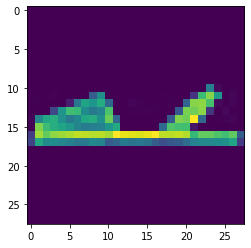

In [ ]:
import numpy as np  
import matplotlib.pyplot as plt
labels = ['t_shirt', 'trouser', 'pullover', 'dress', 'coat',
          'sandal', 'shirt', 'sneaker', 'bag', 'ankle_boots']
img_path = test_images[111]  
print(img_path.shape)
if(len(img_path.shape) == 3):
    plt.imshow(np.squeeze(img_path))    
    label = labels[np.argmax(pred)]
    print(label)
elif(len(img_path.shape) == 2):
    plt.imshow(img_path)
    label = labels[np.argmax(pred)]
    print(label)
else:
    print("Higher dimensional data")